In [1]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

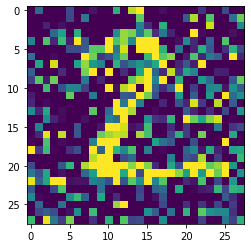

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [5]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [6]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=512,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
118/118 [==============================] - 4s 33ms/step - loss: 0.1672 - val_loss: 0.1660
Epoch 2/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1670 - val_loss: 0.1658
Epoch 3/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1668 - val_loss: 0.1656
Epoch 4/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1665 - val_loss: 0.1654
Epoch 5/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1663 - val_loss: 0.1652
Epoch 6/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1661 - val_loss: 0.1649
Epoch 7/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1659 - val_loss: 0.1647
Epoch 8/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1657 - val_loss: 0.1645
Epoch 9/100
118/118 [==============================] - 4s 32ms/step - loss: 0.1655 - val_loss: 0.1643
Epoch 10/100
118/118 [==============================] - 4s 31ms/step - loss: 0.165

118/118 [==============================] - 4s 31ms/step - loss: 0.1535 - val_loss: 0.1522
Epoch 81/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1533 - val_loss: 0.1521
Epoch 82/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1532 - val_loss: 0.1520
Epoch 83/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1530 - val_loss: 0.1518
Epoch 84/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1529 - val_loss: 0.1517
Epoch 85/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1528 - val_loss: 0.1516
Epoch 86/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1526 - val_loss: 0.1514
Epoch 87/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1525 - val_loss: 0.1513
Epoch 88/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1524 - val_loss: 0.1512
Epoch 89/100
118/118 [==============================] - 4s 31ms/step - loss: 0.1522 - 

In [13]:
result = autoencoder.predict((x_test_noisy[1].reshape(1, 28, 28, 1)))

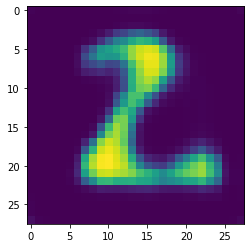

In [14]:
plt.imshow(result.reshape(28, 28))